In [1]:
# Importación de todas las librerias a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
import scipy.stats as st
from scipy import optimize
import statsmodels.api as sm 
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
data1=pd.read_csv('../Proyecto-Final-Finazas-P-blicas-2020/Ingresos.csv', index_col=[0],encoding="'latin-1'").fillna(0)
data1.head()

,Total,Total.1,Total.2,Total.3,Total.4,Total.5,Total.6,Total.7,Total.8,Total.9,...,Zacatecas.21,Zacatecas.22,Zacatecas.23,Zacatecas.24,Zacatecas.25,Zacatecas.26,Zacatecas.27,Zacatecas.28,Zacatecas.29,Zacatecas.30
Año,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,"22,458,426,771","26,231,070,842","34,719,398,284","51,885,273,960","68,140,995,275","90,271,575,407","111,039,766,629","143,670,808,558","189,829,410,773","254,742,222,245",...,"23,538,033,677","25,462,774,498","26,826,368,772","25,834,634,936","28,696,440,001","30,462,058,528","34,484,945,318","39,614,097,562","34,941,953,849","33,806,399,815"
Impuestos,"442,399,845","726,826,110","1,150,208,251","1,584,250,856","1,811,518,273","2,028,854,075","2,385,840,559","3,239,804,409","4,316,514,500","5,541,510,701",...,"266,806,715","308,009,310","475,899,794","503,813,608","442,717,540","375,551,421","424,203,834","970,802,081","1,042,394,304","1,192,542,875"
Cuotas y Aportaciones de Seguridad Social,"3,695,250,647","4,884,929,668","4,316,625,823","10,814,737,266","14,608,994,956","18,757,323,144","8,873,933,306","9,124,233,428","12,066,367,830","12,470,964,745",...,0,0,0,0,0,0,0,0,0,0
Contribuciones de mejoras,0,0,0,0,0,0,"72,480,713","104,882,758","113,591,601","50,751,350",...,"141,141,773","222,072,360","248,019,867","277,989,932","148,044,614","108,179,219","99,531,027","146,430,400","119,077,563","27,175,416"


In [3]:
data2=pd.read_csv('../Proyecto-Final-Finazas-P-blicas-2020/Egresos.csv', index_col=[0],encoding="'latin-1'").fillna(0)
data2.head()

,Total,Total.1,Total.2,Total.3,Total.4,Total.5,Total.6,Total.7,Total.8,Total.9,...,Zacatecas.21,Zacatecas.22,Zacatecas.23,Zacatecas.24,Zacatecas.25,Zacatecas.26,Zacatecas.27,Zacatecas.28,Zacatecas.29,Zacatecas.30
Año,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,"22,458,426,771","26,231,070,842","34,719,398,284","51,885,273,960","68,140,995,275","90,271,575,407","111,039,766,629","143,670,808,558","189,829,410,773","254,742,222,245",...,"23,538,033,677","25,462,774,498","26,826,368,772","25,834,634,936","28,696,440,001","30,462,058,528","34,484,945,318","39,614,097,562","34,941,953,849","33,806,399,815"
Servicios personales,"4,590,245,370","6,203,746,096","8,969,618,712","13,176,083,646","15,794,340,047","20,397,950,195","29,052,010,311","45,572,228,732","60,166,883,050","69,355,668,540",...,"7,428,515,816","8,082,489,248","8,662,437,547","9,178,060,692","9,726,287,651","10,146,481,841","10,782,016,122","11,265,166,306","11,736,510,902","12,547,939,980"
Materiales y suministros,"1,051,656,204","1,627,346,184","1,706,133,188","2,630,814,834","3,943,845,824","4,414,182,291","3,676,942,369","2,594,437,876","3,384,230,958","3,358,558,954",...,"183,642,314","204,954,989","272,307,427","347,353,372","611,625,378","688,685,435","654,881,097","999,669,109","826,900,297","651,177,298"
Servicios generales,"356,005,451","483,824,355","785,545,359","1,068,290,345","1,523,352,488","1,735,500,977","2,129,980,304","4,721,824,363","6,510,017,654","6,804,562,683",...,"766,047,250","539,602,795","616,786,360","622,183,043","856,322,947","959,959,325","951,779,253","1,029,469,617","1,442,492,303","1,291,220,661"


In [4]:
Michoacan_ingreso=data1.iloc[:,465:496]
Michoacan_egreso=data2.iloc[:,465:496]

In [5]:
#Creación Data Frame 'limpio' INGRESOS
ingresos = pd.DataFrame(index=data1.T.iloc[:,0][0:31], columns=['Total','Impuestos','Cuotas y Aportaciones de Seguridad Social',
                        'Contribuciones de mejoras','Derechos','Productos','Aprovechamientos','Participaciones federales',
                        'Aportaciones federales','Otros ingresos','Financiamiento','Disponibilidad inicial'])

ingresos['Total'] = [int([str(Michoacan_ingreso.iloc[1][i]).replace(',','') for i in range(31)][j]) 
                     for j in range(31)]
ingresos['Impuestos'] = [int([str(Michoacan_ingreso.iloc[2][i]).replace(',','') for i in range(31)][j]) 
                         for j in range(31)]
ingresos['Cuotas y Aportaciones de Seguridad Social'] = [int([str(Michoacan_ingreso.iloc[3][i]).replace(',','') for i in range(31)][j]) 
                                                         for j in range(31)]
ingresos['Contribuciones de mejoras'] = [int([str(Michoacan_ingreso.iloc[3][i]).replace(',','') for i in range(31)][j]) 
                                         for j in range(31)]
ingresos['Derechos'] = [int([str(Michoacan_ingreso.iloc[5][i]).replace(',','') for i in range(31)][j]) 
                        for j in range(31)]
ingresos['Productos'] = [int([str(Michoacan_ingreso.iloc[6][i]).replace(',','') for i in range(31)][j]) 
                         for j in range(31)]
ingresos['Aprovechamientos'] = [int([str(Michoacan_ingreso.iloc[7][i]).replace(',','') for i in range(31)][j]) 
                                for j in range(31)]
ingresos['Participaciones federales'] = [int([str(Michoacan_ingreso.iloc[8][i]).replace(',','') for i in range(31)][j]) 
                                         for j in range(31)]
ingresos['Aportaciones federales'] = [int([str(Michoacan_ingreso.iloc[9][i]).replace(',','') for i in range(31)][j]) 
                                      for j in range(31)]
ingresos['Otros ingresos'] = [int([str(Michoacan_ingreso.iloc[10][i]).replace(',','') for i in range(31)][j]) 
                              for j in range(31)]
ingresos['Financiamiento'] = [int([str(Michoacan_ingreso.iloc[11][i]).replace(',','') for i in range(31)][j]) 
                              for j in range(31)]
ingresos['Disponibilidad inicial'] = [int([str(Michoacan_ingreso.iloc[12][i]).replace(',','') for i in range(31)][j]) 
                                      for j in range(31)]

# ingresos.set_index('Año', inplace=True)

ingresos

,Total,Impuestos,Cuotas y Aportaciones de Seguridad Social,Contribuciones de mejoras,Derechos,Productos,Aprovechamientos,Participaciones federales,Aportaciones federales,Otros ingresos,Financiamiento,Disponibilidad inicial
Año,,,,,,,,,,,,
1989,375142272,7493961,18601695,18601695,11396247,5675268,7293421,276038880,3200000,0,45442800,0
1990,558295504,11036654,58299770,58299770,19818073,23331136,10330785,412399893,23079193,0,0,0
1991,781573567,14879485,29378447,29378447,31075544,21518992,13147237,613692577,6288596,0,51592689,0
1992,1101265174,21434688,41464904,41464904,53624838,12135606,19921112,858100416,11738750,0,82844860,0
1993,1241769709,20363018,18950181,18950181,50539052,17032030,18562608,976418706,135955513,0,3948601,0
1994,2877065470,20678486,32519374,32519374,59514400,29017301,15522512,1188025227,1529968742,0,1819428,0
1995,3525088581,23282632,0,0,63186716,86357599,10438239,1345640933,1990019152,0,2666179,0
1996,4665775408,32021464,0,0,77551384,110853544,19871247,1984571013,2438981284,0,0,0
1997,6718004957,41393162,0,0,94410212,103033090,36043399,2667538838,3775586256,0,0,0


In [6]:
#Creación Data Frame 'limpio' EGRESOS
egresos = pd.DataFrame(index=data1.T.iloc[:,0][0:31], columns=['Total','Servicios personales','Materiales y suministros',
                        'Servicios generales','Transferencias, asignaciones, subsidios y otras ayudas',
                        'Bienes muebles, inmuebles e intangibles','Inversión pública',
                        'Inversiones financieras y otras provisiones',
                        'Recursos asignados a municipios','Otros egresos','Deuda pública','Disponibilidad final'])

egresos['Total'] = [int([str(Michoacan_egreso.iloc[1][i]).replace(',','') for i in range(31)][j]) 
                     for j in range(31)]
egresos['Servicios personales'] = [int([str(Michoacan_egreso.iloc[2][i]).replace(',','') for i in range(31)][j]) 
                         for j in range(31)]
egresos['Materiales y suministros'] = [int([str(Michoacan_egreso.iloc[3][i]).replace(',','') for i in range(31)][j]) 
                                                         for j in range(31)]
egresos['Servicios generales'] = [int([str(Michoacan_egreso.iloc[3][i]).replace(',','') for i in range(31)][j]) 
                                         for j in range(31)]
egresos['Transferencias, asignaciones, subsidios y otras ayudas'] = [int([str(Michoacan_egreso.iloc[5][i]).replace(',','') for i in range(31)][j]) 
                        for j in range(31)]
egresos['Bienes muebles, inmuebles e intangibles'] = [int([str(Michoacan_egreso.iloc[6][i]).replace(',','') for i in range(31)][j]) 
                                                      for j in range(31)]
egresos['Inversión pública'] = [int([str(Michoacan_egreso.iloc[7][i]).replace(',','') for i in range(31)][j]) 
                                for j in range(31)]
egresos['Inversiones financieras y otras provisiones'] = [int([str(Michoacan_egreso.iloc[8][i]).replace(',','') for i in range(31)][j]) 
                                         for j in range(31)]
egresos['Recursos asignados a municipios'] = [int([str(Michoacan_egreso.iloc[9][i]).replace(',','') for i in range(31)][j]) 
                                      for j in range(31)]
egresos['Otros egresos'] = [int([str(Michoacan_egreso.iloc[10][i]).replace(',','') for i in range(31)][j]) 
                              for j in range(31)]
egresos['Deuda pública'] = [int([str(Michoacan_egreso.iloc[11][i]).replace(',','') for i in range(31)][j]) 
                              for j in range(31)]
egresos['Disponibilidad final'] = [int([str(Michoacan_egreso.iloc[12][i]).replace(',','') for i in range(31)][j]) 
                                      for j in range(31)]

# ingresos.set_index('Año', inplace=True)

egresos

,Total,Servicios personales,Materiales y suministros,Servicios generales,"Transferencias, asignaciones, subsidios y otras ayudas","Bienes muebles, inmuebles e intangibles",Inversión pública,Inversiones financieras y otras provisiones,Recursos asignados a municipios,Otros egresos,Deuda pública,Disponibilidad final
Año,,,,,,,,,,,,
1989,375142272,111832000,22831500,22831500,131567100,0,50004900,0,0,0,24961300,905072
1990,558295504,174722451,22116038,22116038,169377095,0,80710194,0,0,0,61686273,12349543
1991,781573567,241579941,25741505,25741505,106254078,0,148626044,0,148361050,0,44730463,0
1992,1101265174,324151312,36858039,36858039,189906904,0,239741627,0,200297352,0,11442181,0
1993,1241769709,385048456,38648636,38648636,411362191,0,301491325,0,0,0,9102452,0
1994,2877065470,1793048787,55413415,55413415,246014229,0,372133039,0,266352898,0,11022921,0
1995,3525088581,2194371317,51367672,51367672,245616828,18684792,432452156,8354344,375834989,0,36730637,0
1996,4665775408,3026901138,57522413,57522413,331827732,20905481,408854064,45010035,484877673,0,25971773,66264663
1997,6718004957,4156345406,175103487,175103487,836347538,88536690,513732460,1003256,659650636,0,22644987,4414453


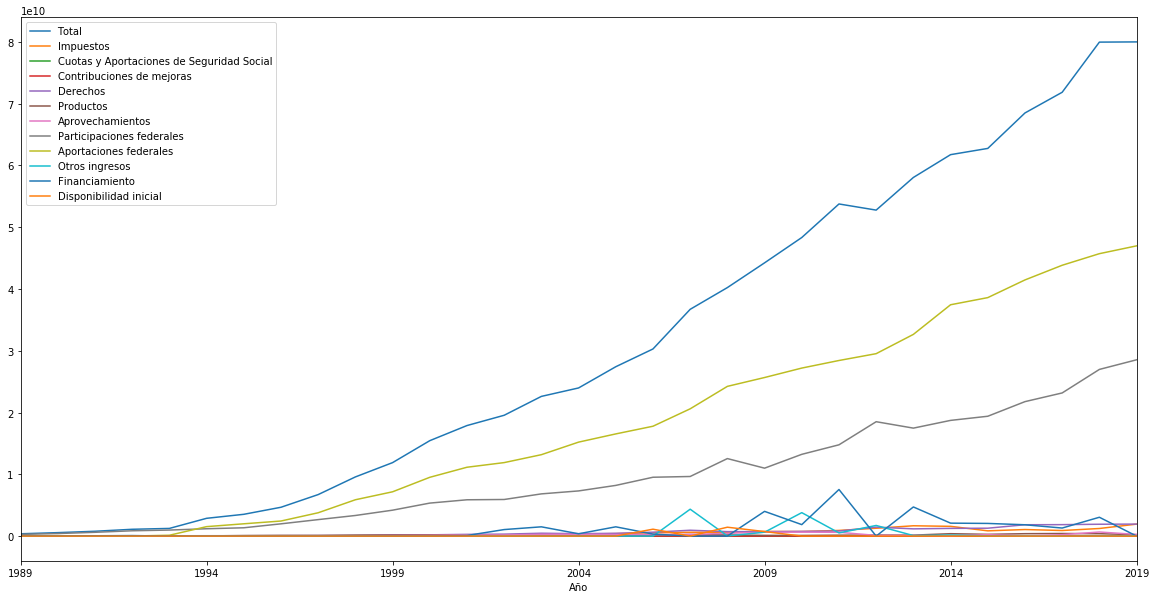

In [7]:
ingresos.plot(figsize=(20,10));

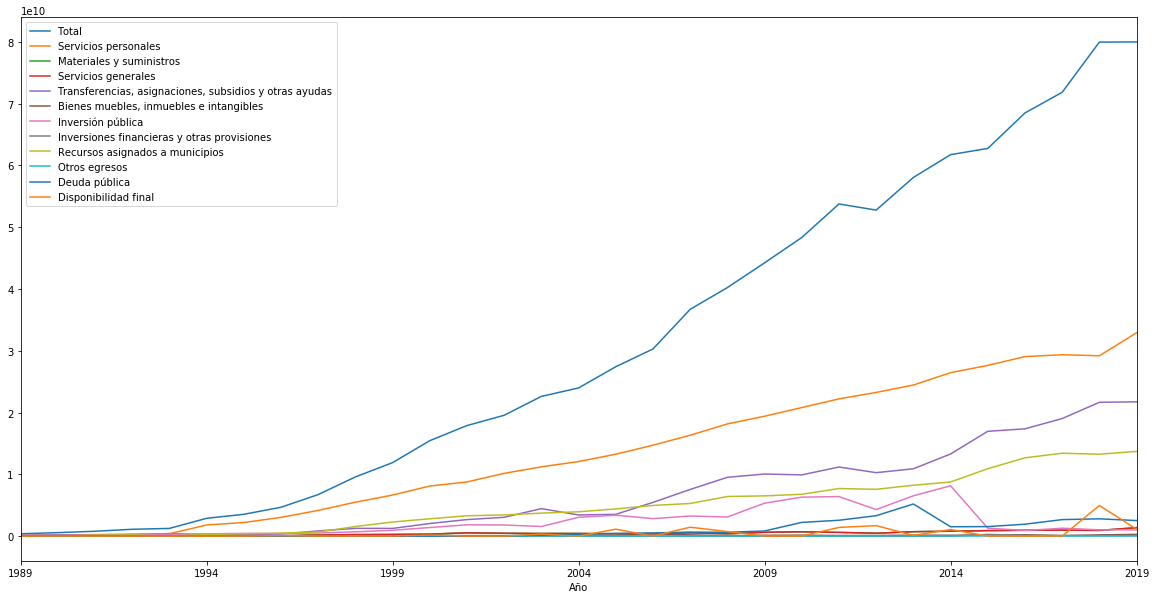

In [8]:
egresos.plot(figsize=(20,10));

,Total
Año,
2015,0.016332
2016,0.091465
2017,0.048920
2018,0.112984
2019,0.000425


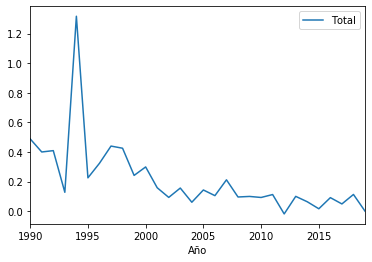

In [9]:
# Obtenemos el rendimiento simple
Total_ingresos=ingresos.drop(columns=ingresos.columns[1:12])
Ri_ingresos = (Total_ingresos.pct_change(1).iloc[1:])
# Obtenemos su media y desviación estándar de los rendimientos
mu_R_ingresos = Ri_ingresos.mean()[0]
sigma_R_ingresos = Ri_ingresos.std()[0]
Ri_ingresos.plot()
Ri_ingresos.tail()

,Total
Año,
2015,0.016332
2016,0.091465
2017,0.048920
2018,0.112984
2019,0.000425


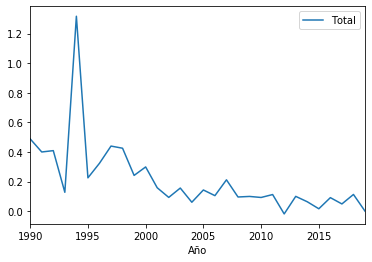

In [10]:
# Obtenemos el rendimiento simple
Total_egresos=egresos.drop(columns=egresos.columns[1:12])
Ri_egresos = (Total_egresos.pct_change(1).iloc[1:]).fillna('No rend.').replace(math.inf,'No calculable')
# Obtenemos su media y desviación estándar de los rendimientos
mu_R_egresos = Ri_egresos.mean()[0]
sigma_R_egresos = Ri_egresos.std()[0]
Ri_egresos.plot()
Ri_egresos.tail()

In [11]:
from datetime import date
# Encontrar la fecha de hoy en formato timestamp
today = '2020'
# Obtener fecha de cierre de la opción a valuar
expiry = '2030'
nscen = 1
# Generar rangos de fechas de días hábiles
dates = (2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030)
ndays = len(dates)

In [12]:
# Simular los rendimientos
# Rendimiento diario 
dt_ingresos = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z_ingresos = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt_ingresos = pd.DataFrame(mu_R_ingresos * dt_ingresos + Z_ingresos * sigma_R_ingresos * np.sqrt(dt_ingresos), index=dates)

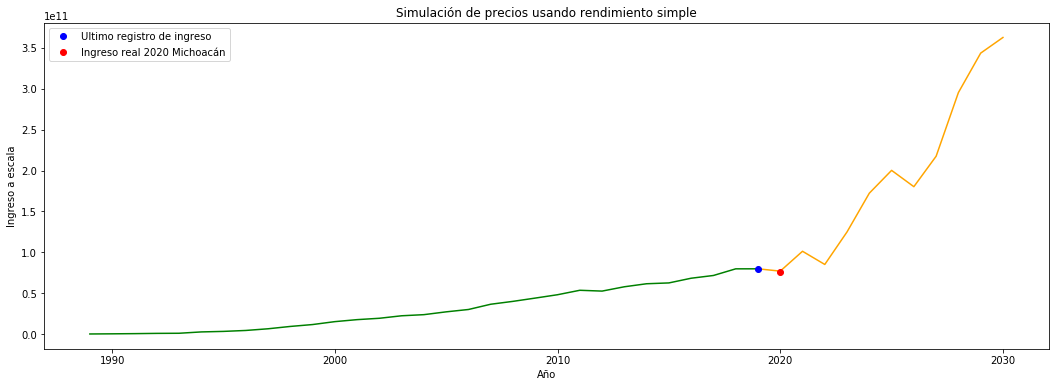

Ingreso real Michoacán 2019= 79,978,749,718.0
Ingreso real Michoacán 2020= 75,914,903,948.0
Ingreso sumulado 2020 Michoacán = 77,140,238,165.0


In [13]:
# Simulación del precio
S_0_ingresos = Total_ingresos.iloc[-1,0]
S_T_ingresos = S_0_ingresos*(1+Ri_dt_ingresos).cumprod()

Simulacion_ingreso=pd.DataFrame(index=np.arange(1989,2031),columns=['Total'])
Simulacion_ingreso['Total']= np.array(pd.concat([Total_ingresos.iloc[:,0],S_T_ingresos])) 

# Se muestran los precios simulados con los precios descargados
plt.figure(figsize=(18,6))
plt.plot(Simulacion_ingreso[0:31],'g')
plt.plot(Simulacion_ingreso[30:42],'orange')
plt.plot(2019,Total_ingresos.iloc[-1],'ob',label='Ultimo registro de ingreso')
plt.plot(2020,7.5914903948e10,'or',label='Ingreso real 2020 Michoacán')
plt.xlabel('Año')
plt.ylabel('Ingreso a escala')
plt.title('Simulación de precios usando rendimiento simple');
plt.legend();
plt.show()
print('Ingreso real Michoacán 2019=',format(int(Total_ingresos.iloc[-1]),'0,.1f'))
print('Ingreso real Michoacán 2020=',format(7.5914903948e10,'0,.1f'))
print('Ingreso sumulado 2020 Michoacán =',format(int(Simulacion_ingreso.iloc[31]),'0,.1f'))